### 0. 데이터 호출 및 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계 학습을 위한 패키지
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계 학습을 위한 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
def perf_eval(cm: np.array):
    # True positive rate: TPR (recall)
    tpr = cm[1,1]/np.sum(cm[1])
    # Precision
    pre = cm[1,1]/np.sum(cm[1])
    # True negative rate: TNR
    tnr = cm[0,0]/np.sum(cm[0])
    # Simple Accuracy
    acc = (cm[0,0]+cm[1,1])/np.sum(cm)
    # Balanced Correction Rate
    bcr = np.sqrt(tpr*tnr)
    # F1-Measure
    f1 = 2*tpr*pre/(tpr+pre)

    return tpr, pre, tnr, acc, bcr, f1

    # confusion matrix를 input으로

In [ ]:
perf_table = pd.DataFrame(
    data    = np.zeros(shape=(6,6)),
    index   = ["ANN", "CART", "Bagging ANN", "AdaBoost", "GBM", "Random Forests"],
    columns = ["TPR", "Precision", "TNR", "Accuracy", "BCR", "F1-Measure"]
)

In [ ]:
Earthquate_Damage = pd.read_csv("/content/drive/MyDrive/sample_data/Earthquate_Damage.csv").set_index('building_id')
Earthquate_Damage

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
Earthquate_Damage = Earthquate_Damage.reset_index(drop=True)
Earthquate_Damage.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
# object 형이 8개 있으므로 one hot encoding 수행
# 범주형 개수만큼의 이진형 변수들로 구성하라고 했으므로 dummy variable 생성 시 drop_first=True는 설정하지 않음


Earthquate_Damage2 = pd.get_dummies(Earthquate_Damage, columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status'])


' 69개 int 형태의 column 주어짐 '

In [ ]:
# input과 target 분리

Damage_input = Earthquate_Damage2.drop(['damage_grade'],axis=1)
Damage_target = Earthquate_Damage2[['damage_grade']]

print(Damage_input.shape)
print(Damage_target.shape)


(260601, 68)
(260601, 1)


In [ ]:
# ANN 정규화해야 하므로, 그냥 3개 모델 모두 정규화한 데이터셋 사용

scaler = StandardScaler()   # 평균 0 표준편차 1로 정규화 수행
Damage_input_scaled = scaler.fit_transform(Damage_input)
Damage_target2 = Earthquate_Damage.iloc[:,38]

In [ ]:
# [2] 데이터셋 분리
# 빌딩이 포함된 -> buliding_id를 말하는건가?

# 임의로 분리하라고 했으므로 index 순서대로 추출

# Divide the dataset into the training dataset and test dataset
trn_idx = range(150000) # 학습
val_idx = range(150000,200000) # 평가
tst_idx = range(200000,260601)


# Input/target configuration
trn_input = Damage_input_scaled[trn_idx,:]
trn_target = Damage_target2[trn_idx]

val_input = Damage_input_scaled[val_idx,:]
val_target = Damage_target2[val_idx]

tst_input = Damage_input_scaled[tst_idx,:]
tst_target = Damage_target2[tst_idx]


In [ ]:
print(trn_input.shape)
print(trn_target.shape)
print(val_input.shape)
print(val_target.shape)
print(tst_input.shape)
print(tst_target.shape)

(150000, 68)
(150000,)
(50000, 68)
(50000,)
(60601, 68)
(60601,)


###    1. 다중 로지스틱 회귀분석

In [ ]:
from typing import Union
import numpy as np
from sklearn.metrics import confusion_matrix

# Performance evaluation function for Classification

def perf_eval_clf(y_true: Union[np.array,list], y_pred: Union[np.array,list])->list:
    """
    Input:
    y_true : ndarray of shape (n_samples,)
    y_pred : ndarray of shape (n_samples,)

    Return:
    [TPR,Precision,TNR, Accuracy, BCR, F1]: scores of classification in a list
    """
    tn, fp, fn, tp = confusion_matrix(y_true = y_true, y_pred = y_pred).ravel()
    TPR = round(tp/(tp+fn),4)
    PRE = round(tp/(tp+fp),4)
    TNR = round(tn/(fp+tn),4)
    ACC = round((tp+tn)/(tn+fp+fn+tp),4)
    BCR = round(np.sqrt([TPR*TNR])[0],4)
    F1 = round(2*TPR*PRE/(TPR+PRE),4)


    return [TPR,PRE,TNR,ACC,BCR,F1]

In [ ]:
import pandas as pd

def display_result(result_dict: dict, metric_names: list):
    """
    Input:
    result_dict : 데이터 셋 별 classification 평가 결과 저장한 dictionary
    ex) {'Personal Loan':[0.1,0.5,0.3],...}

    metric_names : Classification 평가 지표 이름 List
    ex) ['TPR(Recall)','Precision','TNR','ACC','BCR','F1']
    """
    result_df = pd.DataFrame(result_dict).T
    result_df.index = list(result_dict.keys())
    result_df.columns = metric_names

    display(result_df)

result_dict= {}

In [ ]:
from typing import Union
import numpy as np
from sklearn.metrics import confusion_matrix


def perf_eval3(cm: np.array)->list:
    """
    Input:
    cm : ndarray of shape (n_labels,n_labels) / For 'wine' dataset, n_labels is 3

    Return:
    [Accuracy,BCR]: scores of classification in a list
    """
    # simple accuracy
    ACC = round(np.sum(np.diag(cm))/np.sum(cm),3)

    # accuracy for each class
    A1 = cm[0,0]/np.sum(cm[0,:])
    A2 = cm[1,1]/np.sum(cm[1,:])
    A3 = cm[2,2]/np.sum(cm[2,:])
    BCR = round((A1*A2*A3)**(1/3),3)

    return [ACC,BCR]

result_dict = {}

In [ ]:
trn_target = trn_target - 1
val_target = val_target - 1
tst_target = tst_target - 1

In [ ]:
feature_names = list(Earthquate_Damage2.columns)[1:]
feature_names

In [ ]:
from sklearn.linear_model import LogisticRegression

# model setting
ml_logit = LogisticRegression(
    solver='lbfgs',
    max_iter=int(1e+10)
)

# Train the model with trainset
ml_logit.fit(trn_input,trn_target)

LogisticRegression(max_iter=10000000000)

In [ ]:
# Prediction
CART_pre_prediction = ml_logit.predict(tst_input)
cm = confusion_matrix(tst_target, CART_pre_prediction)
Perf_table.iloc[0] = perf_eval(cm)
Perf_table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.95941,0.885043,0.315531,0.524595,0.550203,0.920727
CART,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ANN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Random Forests,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging CART,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging ANN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
AdaBoost,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
GBM,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
lr_response = ml_logit.predict(tst_input)
cm = confusion_matrix(tst_target,lr_response);cm

array([[ 1814,  3911,   160],
       [ 1240, 30039,  3168],
       [   92, 16083,  4094]])

In [ ]:
clf_results = perf_eval3(cm)
result_dict['damage'] = clf_results
metric_names = ['ACC','BCR']
display_result(result_dict,metric_names)

,ACC,BCR
damage,0.593,0.379


### 2. CART - hyperparameter setting

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

import graphviz

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Performance Evaluation Function ------------------------------------------------
def perf_eval(cm):
    _tp = cm[1, 1]
    _fn = cm[1, 0]
    _fp = cm[0, 1]
    _tn = cm[0, 0]

    # True positive rate: TPR (Recall)
    TPR = _tp / (_tp + _fn)
    # Precision
    PRE = _tp/(_tp+_fp)
    # True negative rate: TNR
    TNR = _tn/(_tn+_fp)
    # Simple Accuracy
    ACC = (_tp + _tn) / np.sum(cm)
    # Balanced Correction Rate
    BCR = np.sqrt(TPR*TNR)
    # F1-Measure
    F1 = 2*TPR*PRE/(TPR+PRE)

    return TPR, PRE, TNR, ACC, BCR, F1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Define the hyperparameter combinations to try
criterion_values = ["gini", "entropy","log_loss"]
min_split_values = [50, 100, 200,250]
max_depth_values = [ 5, 10, 20,30]

best_score = 0.0
best_params = {}

# Loop over all hyperparameter combinations
for criterion in criterion_values:
    for min_split in min_split_values:
        for max_depth in max_depth_values:
            # Create the decision tree model with current hyperparameters
            model = DecisionTreeClassifier(criterion=criterion, min_samples_split=min_split, max_depth=max_depth, random_state=12345)

            # Fit the model on the training data
            model.fit(trn_input, trn_target)

            # Make predictions on the validation data
            val_predictions = model.predict_proba(val_input)

            # Calculate the ROC AUC score for each class
            score = roc_auc_score(y_score=val_predictions, y_true=val_target, multi_class='ovo')

            # Check if the current score is better than the previous best score
            if score > best_score:
                best_score = score
                best_params = {'criterion': criterion, 'min_samples_split': min_split, 'max_depth': max_depth}

# Create the best model with the optimal hyperparameters
best_model = DecisionTreeClassifier(**best_params)

# Fit the best model on the training data
best_model.fit(trn_input, trn_target)

# Make predictions on the validation data using the best model
val_predictions = best_model.predict(val_input)


In [ ]:
# Prediction
CART_pre_prediction = dt.predict(tst_input)
cm = confusion_matrix(tst_target, CART_pre_prediction)
Perf_table.iloc[1] = perf_eval(cm)
Perf_table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.959410,0.885043,0.315531,0.524595,0.550203,0.920727
CART,0.949449,0.897699,0.436836,0.509365,0.644013,0.922849
ANN,0.948161,0.898111,0.428771,0.515190,0.637608,0.922458
Random Forests,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging CART,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdaBoost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 3. ANN - optimal hyperparameter

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

activation_values = ["logistic", "tanh", "relu"]
hidden_layer_sizes_values = [10, 20, 30 ]
max_iter_values = [ 10,20,30]


best_score = 0.0
best_params = {}

# Loop over all hyperparameter combinations
for activation in activation_values:
    for hidden_layer_sizes in hidden_layer_sizes_values:
        for max_iter in max_iter_values:
            # Create the ANN model with current hyperparameters
            model = MLPClassifier(activation=activation, hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=12345)

            # Fit the model on the training data
            model.fit(trn_input, trn_target)

            # Make predictions on the validation data
            val_predictions = model.predict_proba(val_input)

            # Calculate the ROC AUC score for each class
            score = roc_auc_score(y_score=val_predictions, y_true=val_target, multi_class='ovo')

            # Check if the current score is better than the previous best score
            if score > best_score:
                best_score = score
                best_params = {'activation': activation, 'hidden_layer_sizes': hidden_layer_sizes, 'max_iter': max_iter}

# Create the best model with the optimal hyperparameters
best_model = MLPClassifier(**best_params)

# Fit the best model on the training data
best_model.fit(trn_input, trn_target)

# Make predictions on the validation data using the best model
val_predictions = best_model.predict(val_input)

print(best_params)

{'activation': 'tanh', 'hidden_layer_sizes': 30, 'max_iter': 30}


In [ ]:
# Prediction
CART_pre_prediction = best_model.predict(tst_input)
cm = confusion_matrix(tst_target, CART_pre_prediction)
Perf_Table.iloc[4] = perf_eval(cm)
Perf_Table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.959410,0.885043,0.315531,0.524595,0.550203,0.920727
CART,0.949449,0.897699,0.436836,0.509365,0.644013,0.922849
ANN,0.948161,0.898111,0.428771,0.515190,0.637608,0.922458
Random Forests,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging CART,0.950861,0.898079,0.446072,0.510190,0.651270,0.923717
Bagging ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdaBoost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Q2. CART의 bagging bootstrap 수행

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(300,0,-30)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = DecisionTreeClassifier(min_samples_split=250,max_depth=20,random_state=12345,criterion='gini'),
      n_estimators = n,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  Perf_Table.iloc[1] = perf_eval(cm)
  print(Perf_Table)

  CART_pre_prediction = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, CART_pre_prediction)
  Perf_Table.iloc[1] = perf_eval(cm)
  print(Perf_Table)



end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')



## 3. RF 30 단위씩 acc 평가하기 / 학습과정에서 변수 중요도 산출




In [ ]:
import time
import datetime

total_start = time.time()


output = []

for i, n in enumerate(np.arange(300,0,-30)):
  start = time.time()

  rf_model = RandomForestClassifier(

      n_estimators = n,
      verbose      = 1,
      random_state = 42,
      n_jobs = -1
  ).fit(X=trn_input, y=trn_target)

  var_imp = rf_model.feature_importances_

  var_imp_df = pd.DataFrame(
      data = var_imp,
      columns = ['variables importance'],
      index = Damage_input.columns
  ).sort_values('variables importance', ascending=False)
  output.append(var_imp_df['variables importance'].tolist())

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = rf_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  Perf_Table.iloc[1] = perf_eval(cm)
  print(Perf_Table)

  CART_pre_prediction = rf_model.predict(tst_input)
  cm = confusion_matrix(tst_target, CART_pre_prediction)
  Perf_Table.iloc[1] = perf_eval(cm)
  print(Perf_Table)

print(output)

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   59.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


0 th time 0:01:00.211838


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN      NaN       NaN        NaN
Pre-Pruning   0.955729  0.906597  0.480333  0.51686  0.677546   0.930515


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR  Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN       NaN       NaN        NaN
Pre-Pruning   0.955552   0.90271  0.466551  0.514348  0.667693   0.928379


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   48.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


1 th time 0:00:48.513308


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN      NaN       NaN        NaN
Pre-Pruning   0.955545  0.906232  0.478094  0.51676  0.675899   0.930235


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR  Accuracy      BCR F1-Measure
Post-Pruning       NaN       NaN       NaN       NaN      NaN        NaN
Pre-Pruning   0.955708  0.902557  0.466331  0.514331  0.66759   0.928372


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   42.3s finished


2 th time 0:00:42.733959


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


                  TPR Precision       TNR Accuracy       BCR F1-Measure
Post-Pruning      NaN       NaN       NaN      NaN       NaN        NaN
Pre-Pruning   0.95565  0.906698  0.480753  0.51686  0.677814   0.930531


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR  Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN       NaN       NaN        NaN
Pre-Pruning   0.955665  0.902908  0.468126  0.514348  0.668858   0.928538


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   33.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


3 th time 0:00:33.627995


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    2.1s finished


                   TPR Precision       TNR Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN      NaN       NaN        NaN
Pre-Pruning   0.955673  0.906257  0.477759  0.51684  0.675708    0.93031


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    2.4s finished


                   TPR Precision       TNR  Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN       NaN       NaN        NaN
Pre-Pruning   0.955832  0.902787  0.466539  0.514595  0.667782   0.928553


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   29.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


4 th time 0:00:29.521105


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN      NaN       NaN        NaN
Pre-Pruning   0.955993  0.906827  0.481386  0.51684  0.678382   0.930761


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR  Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN       NaN       NaN        NaN
Pre-Pruning   0.955491  0.902794  0.467882  0.514199  0.668623   0.928396


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   25.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


5 th time 0:00:25.952534


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR Accuracy      BCR F1-Measure
Post-Pruning       NaN       NaN       NaN      NaN      NaN        NaN
Pre-Pruning   0.955182  0.907479  0.485977   0.5164  0.68132    0.93072


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


                  TPR Precision       TNR  Accuracy       BCR F1-Measure
Post-Pruning      NaN       NaN       NaN       NaN       NaN        NaN
Pre-Pruning   0.95546  0.903073  0.469043  0.513886  0.669442   0.928528


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   21.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


6 th time 0:00:21.877932


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN      NaN       NaN        NaN
Pre-Pruning   0.955065  0.907449  0.485445  0.51678  0.680905   0.930649


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR  Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN       NaN       NaN        NaN
Pre-Pruning   0.954533  0.903094  0.469729  0.513275  0.669606   0.928101


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   17.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


7 th time 0:00:17.853559


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision      TNR Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN      NaN      NaN       NaN        NaN
Pre-Pruning   0.954584  0.907063  0.48318  0.51592  0.679143   0.930217


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR  Accuracy      BCR F1-Measure
Post-Pruning       NaN       NaN       NaN       NaN      NaN        NaN
Pre-Pruning   0.954289  0.903276  0.471836  0.512945  0.67102   0.928082


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


8 th time 0:00:09.894168


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision      TNR Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN      NaN      NaN       NaN        NaN
Pre-Pruning   0.953246  0.907779  0.48896  0.51496  0.682715   0.929957


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision     TNR  Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN     NaN       NaN       NaN        NaN
Pre-Pruning   0.953372   0.90331  0.4723  0.511691  0.671027   0.927666


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


9 th time 0:00:05.242628


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


                   TPR Precision       TNR Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN      NaN       NaN        NaN
Pre-Pruning   0.949458  0.907146  0.486144  0.51264  0.679392    0.92782
                   TPR Precision       TNR  Accuracy       BCR F1-Measure
Post-Pruning       NaN       NaN       NaN       NaN       NaN        NaN
Pre-Pruning   0.950184  0.905008  0.483415  0.510883  0.677741   0.927046
[[0.15197810863895717, 0.13464966890724672, 0.13408935283880324, 0.11949139740044275, 0.10970840261872683, 0.05654039408680821, 0.02450800938496752, 0.016857025583302033, 0.014109565172043554, 0.013197854212358468, 0.011839385436052893, 0.00992822793719504, 0.009610600656575473, 0.008683874967850449, 0.008136953150747663, 0.008021211842663224, 0.00778297721981899, 0.007726459836500622, 0.0076221332156623115, 0.007570749919693429, 0.0075589236314399155, 0.007427214307551082, 0.007235340345353513, 0.006869020648423051, 0.006574367805371112, 0.006013263846

[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.4s finished


In [ ]:
# 변수 중요도
for i in range(10):
  print(output[i])

[0.15197810863895717, 0.13464966890724672, 0.13408935283880324, 0.11949139740044275, 0.10970840261872683, 0.05654039408680821, 0.02450800938496752, 0.016857025583302033, 0.014109565172043554, 0.013197854212358468, 0.011839385436052893, 0.00992822793719504, 0.009610600656575473, 0.008683874967850449, 0.008136953150747663, 0.008021211842663224, 0.00778297721981899, 0.007726459836500622, 0.0076221332156623115, 0.007570749919693429, 0.0075589236314399155, 0.007427214307551082, 0.007235340345353513, 0.006869020648423051, 0.006574367805371112, 0.006013263846976133, 0.005928938904520424, 0.005684241005282455, 0.005444883662796556, 0.005382997990957398, 0.005038861702810515, 0.004705709661173472, 0.004548569801405119, 0.004535065264857822, 0.004379416262984104, 0.0043450607112243845, 0.0041873920102812115, 0.003726246209066329, 0.0037103484233034197, 0.003601868815508778, 0.0034892468354923824, 0.0033573530077332285, 0.003173985177484218, 0.003110495576239756, 0.0025965383467968645, 0.00238500

In [ ]:
var_imp_df['variables importance'] = [0.1523182450744928, 0.13441405571481954, 0.13405301961081126, 0.11983293648418467, 0.10755595271535202, 0.05560775952147384, 0.02441284481273846, 0.016808056748579946, 0.01610514052070534, 0.012386680684975847, 0.011743888771305134, 0.009574266323071548, 0.008970546655727978, 0.008709672479043104, 0.008339796187791907, 0.008100318053047695, 0.008011996983587247, 0.00790956354435726, 0.007753649833484421, 0.007708389266181496, 0.007660425784062672, 0.007516236040721983, 0.007405119603724988, 0.006892317381099275, 0.0062036595194199405, 0.006062155313742402, 0.0060345338569222935, 0.006013687750269106, 0.005743315143942352, 0.005563858439098008, 0.005349417287306735, 0.005080269116254742, 0.004727512333515682, 0.004597072391523296, 0.004423236642689168, 0.004360593870713458, 0.004057404912816188, 0.004051659552506113, 0.00374350942926642, 0.003523538678500973, 0.0034757057398216713, 0.003254046301717033, 0.0030881423128654236, 0.0029144090555826415, 0.002511403994544131, 0.0024717658507258052, 0.0024011597317472703, 0.0017374130562898683, 0.0012608312232287942, 0.0012403803746731863, 0.0011239912891593453, 0.001066323150854895, 0.0010260264597188313, 0.00063507994685207, 0.0004283581587092998, 0.0003984059705094494, 0.0003556569462187645, 0.00027723814719220023, 0.0002598449635144762, 0.0002097012523603732, 0.00020068891686506475, 0.00011238809375766955, 6.185866516306851e-05, 5.0702517923324125e-05, 4.807478627859462e-05, 3.367531163813729e-05, 1.5296377004753236e-05, 1.5128371256727036e-05]

var_imp_df

,variables importance
geo_level_3_id,0.152318
geo_level_2_id,0.134414
geo_level_1_id,0.134053
age,0.119833
area_percentage,0.107556
...,...
has_secondary_use_health_post,0.000051
plan_configuration_m,0.000048
has_secondary_use_gov_office,0.000034
plan_configuration_f,0.000015


<Axes: ylabel='variables importance'>

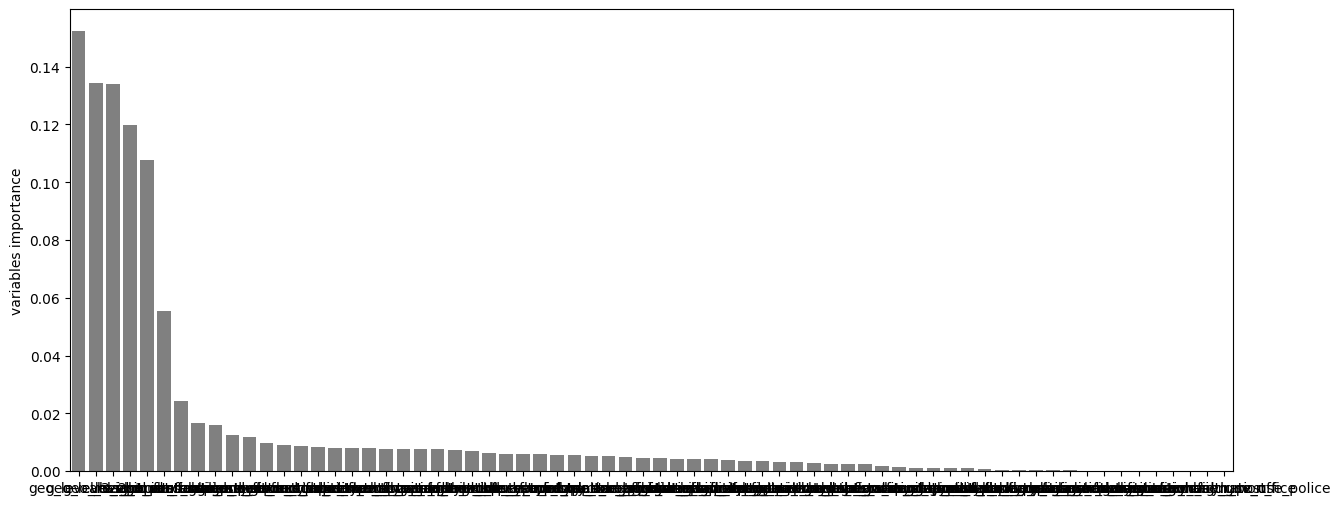

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(
  x     = var_imp_df.index,
  y     = 'variables importance',
  color = 'grey',
  data  = var_imp_df

)

In [ ]:
# best Random Forest test set evaluation

# Prediction
CART_pre_prediction = rf_model.predict(tst_input)
cm = confusion_matrix(tst_target, CART_pre_prediction)
Perf_Table.iloc[3] = perf_eval(cm)
Perf_Table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.959410,0.885043,0.315531,0.524595,0.550203,0.920727
CART,0.949449,0.897699,0.436836,0.509365,0.644013,0.922849
ANN,0.948161,0.898111,0.428771,0.515190,0.637608,0.922458
Random Forests,0.955665,0.902908,0.468126,0.514348,0.668858,0.928538
Bagging CART,0.950861,0.898079,0.446072,0.510190,0.651270,0.923717
Bagging ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdaBoost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# 두 모델 10개 성능 비교

cart_acc = [0.51019,0.51532,0.51523,0.51123,0.51155,0.510667,0.51036,0.51044,0.510552,0.510241 ]
cart_bcr = [0.65127,0.65142,0.652532,0.65044,0.651241,0.65124,0.651124,0.65024,0.652447,0.65156]

RF_acc = [0.514348,0.514331,0.514348,0.514595,0.514199,0.513886,0.513275,0.512945,0.511691,0.510883]
RF_bcr = [0.667693,0.66759,0.668858,0.667782,0.668623,0.669442,0.669606,0.67102,0.671027,0.677741]

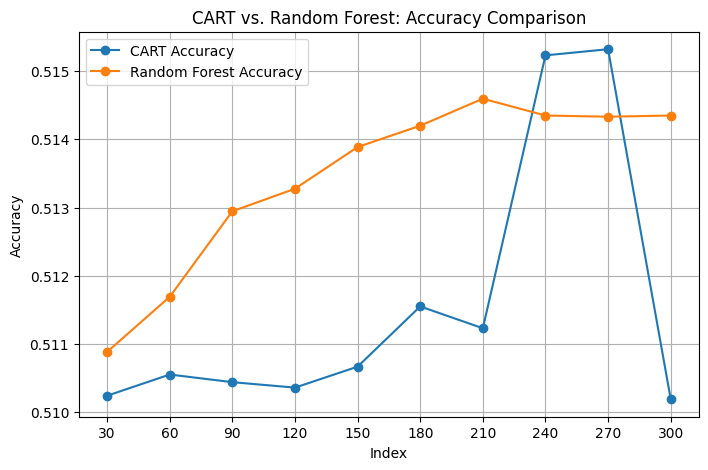

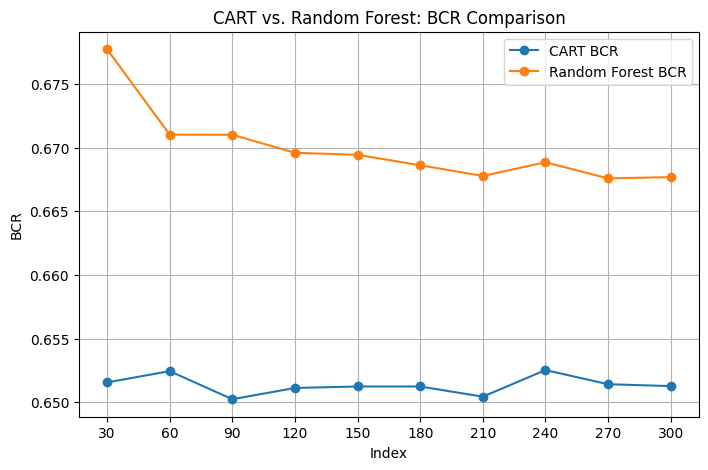

In [ ]:
import matplotlib.pyplot as plt

# Accuracy comparison
index_values = [300, 270, 240, 210, 180, 150, 120, 90, 60, 30]

plt.figure(figsize=(8, 5))
plt.plot(index_values, cart_acc, label='CART Accuracy', marker='o')
plt.plot(index_values, RF_acc, label='Random Forest Accuracy', marker='o')
plt.xlabel('Index')
plt.ylabel('Accuracy')
plt.title('CART vs. Random Forest: Accuracy Comparison')
plt.xticks(index_values)
plt.legend()
plt.grid(True)
plt.show()

# BCR comparison
plt.figure(figsize=(8, 5))
plt.plot(index_values, cart_bcr, label='CART BCR', marker='o')
plt.plot(index_values, RF_bcr, label='Random Forest BCR', marker='o')
plt.xlabel('Index')
plt.ylabel('BCR')
plt.title('CART vs. Random Forest: BCR Comparison')
plt.xticks(index_values)
plt.legend()
plt.grid(True)
plt.show()


### 4. 최적의  ANN 단일모형 30번 반복 후 acc, bcr의 평균과 표준편차 구하기

In [ ]:

acc_list = []
BCR_list = []

# 단일 ANN 몇분?
for i in range(30):

  mlp_model = MLPClassifier(hidden_layer_sizes=30,max_iter=30,activation='tanh'
        ,early_stopping=True,solver='adam')


  mlp_model.fit(trn_input, trn_target)

  CART_pre_prediction = mlp_model.predict(tst_input)
  cm = confusion_matrix(tst_target, CART_pre_prediction)
  Perf_table1.iloc[5] = perf_eval(cm)
  acc_list.append(Perf_table1['Accuracy'].loc['Bagging ANN'])
  BCR_list.append(Perf_table1['BCR'].loc['Bagging ANN'])
  print(acc_list)
  print(BCR_list)

print(acc_list)
print(BCR_list)

print(np.std(acc_list))
print(np.std(BCR_list))

[0.5128463226679427]
[0.6275807310749818]
[0.5128463226679427, 0.5091170112704411]
[0.6275807310749818, 0.6185741014060402]
[0.5128463226679427, 0.5091170112704411, 0.5031600138611574]
[0.6275807310749818, 0.6185741014060402, 0.6402778790346114]
[0.5128463226679427, 0.5091170112704411, 0.5031600138611574, 0.5030940083496972]
[0.6275807310749818, 0.6185741014060402, 0.6402778790346114, 0.6154423931660222]
[0.5128463226679427, 0.5091170112704411, 0.5031600138611574, 0.5030940083496972, 0.5079619148198875]
[0.6275807310749818, 0.6185741014060402, 0.6402778790346114, 0.6154423931660222, 0.6330466685929048]
[0.5128463226679427, 0.5091170112704411, 0.5031600138611574, 0.5030940083496972, 0.5079619148198875, 0.5161135954852231]
[0.6275807310749818, 0.6185741014060402, 0.6402778790346114, 0.6154423931660222, 0.6330466685929048, 0.5985330803903995]
[0.5128463226679427, 0.5091170112704411, 0.5031600138611574, 0.5030940083496972, 0.5079619148198875, 0.5161135954852231, 0.4988201514826488]
[0.6275

In [ ]:
print(np.mean(acc_list))
print(np.mean(BCR_list))

0.5076483886404514
0.6143152742923647


## 5. ANN_bagging

##### 30,60,90

In [ ]:
# bootstrap = 30

import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(10,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 30,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복

0 th time 0:08:35.951218
validation : [0.648, 0.5]
test : [0.652, 0.51]
1 th time 0:08:34.251036
validation : [0.648, 0.49]
test : [0.652, 0.503]
2 th time 0:08:32.313350
validation : [0.646, 0.498]
test : [0.65, 0.51]
3 th time 0:08:34.035182
validation : [0.647, 0.498]
test : [0.651, 0.508]
4 th time 0:08:30.329619
validation : [0.644, 0.49]
test : [0.647, 0.501]
5 th time 0:08:29.313259
validation : [0.645, 0.495]
test : [0.651, 0.509]
6 th time 0:08:26.010411
validation : [0.645, 0.492]
test : [0.65, 0.504]
7 th time 0:08:28.356659
validation : [0.649, 0.494]
test : [0.653, 0.504]
8 th time 0:08:31.053482
validation : [0.645, 0.495]
test : [0.649, 0.506]
9 th time 0:08:29.838275
validation : [0.648, 0.497]
test : [0.653, 0.508]
total time : 1:26:19.275809


In [ ]:
# bootstrap = 60

import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(10,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 60,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 60, 10번 반복

0 th time 0:10:15.040720
validation : [0.647, 0.495]
test : [0.652, 0.509]
1 th time 0:10:27.028217
validation : [0.645, 0.496]
test : [0.65, 0.507]
2 th time 0:10:15.569378
validation : [0.644, 0.493]
test : [0.649, 0.505]
3 th time 0:10:24.370656
validation : [0.645, 0.493]
test : [0.649, 0.504]
4 th time 0:10:14.722603
validation : [0.644, 0.495]
test : [0.649, 0.507]
5 th time 0:10:06.052083
validation : [0.645, 0.496]
test : [0.649, 0.507]
6 th time 0:10:14.692586
validation : [0.645, 0.496]
test : [0.649, 0.508]
7 th time 0:10:13.023771
validation : [0.644, 0.494]
test : [0.65, 0.506]
8 th time 0:10:16.276859
validation : [0.647, 0.498]
test : [0.651, 0.51]
9 th time 0:10:10.427982
validation : [0.645, 0.495]
test : [0.65, 0.507]
total time : 1:43:49.686112


In [ ]:
# bootstrap = 90

import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(10,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 90,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 90, 10번 반복

0 th time 0:15:14.649040
validation : [0.647, 0.496]
test : [0.651, 0.508]
1 th time 0:15:14.850212
validation : [0.645, 0.494]
test : [0.65, 0.506]
2 th time 0:15:16.195413
validation : [0.645, 0.496]
test : [0.65, 0.509]
3 th time 0:15:17.153656
validation : [0.645, 0.495]
test : [0.651, 0.507]
4 th time 0:15:17.013905
validation : [0.646, 0.494]
test : [0.65, 0.506]
5 th time 0:15:14.767091
validation : [0.646, 0.495]
test : [0.65, 0.506]
6 th time 0:15:31.365875
validation : [0.646, 0.492]
test : [0.65, 0.503]
7 th time 0:15:07.159493
validation : [0.645, 0.494]
test : [0.65, 0.506]
8 th time 0:15:29.878037
validation : [0.648, 0.496]
test : [0.652, 0.509]
9 th time 0:15:26.021844
validation : [0.646, 0.496]
test : [0.651, 0.508]
total time : 2:34:53.373636


##### 120

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(10,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 120,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복

# 180 3시간

0 th time 0:35:00.778292
validation : [0.646, 0.496]
test : [0.651, 0.508]
1 th time 0:34:49.355716
validation : [0.646, 0.496]
test : [0.65, 0.507]
2 th time 0:34:45.412019
validation : [0.648, 0.496]
test : [0.652, 0.508]
3 th time 0:34:46.609296
validation : [0.644, 0.493]
test : [0.65, 0.505]
4 th time 0:35:12.959379
validation : [0.645, 0.495]
test : [0.65, 0.506]
5 th time 0:34:59.603890
validation : [0.644, 0.493]
test : [0.65, 0.504]
6 th time 0:34:43.506757
validation : [0.645, 0.493]
test : [0.65, 0.506]
7 th time 0:34:35.511034
validation : [0.645, 0.494]
test : [0.65, 0.506]


KeyboardInterrupt: ignored

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(7,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 120,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복

0 th time 0:20:29.982974
validation : [0.646, 0.494]
test : [0.65, 0.506]
1 th time 0:20:46.880682
validation : [0.646, 0.497]
test : [0.651, 0.508]


KeyboardInterrupt: ignored

##### 150

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(10,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 150,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# 6 * 40 = 240 4시간

0 th time 0:41:58.408331
validation : [0.646, 0.497]
test : [0.65, 0.508]
1 th time 0:41:58.838675
validation : [0.645, 0.494]
test : [0.649, 0.506]
2 th time 0:41:45.226151
validation : [0.644, 0.492]
test : [0.649, 0.505]
3 th time 0:41:52.952398
validation : [0.645, 0.494]
test : [0.65, 0.504]
4 th time 0:42:01.579436
validation : [0.644, 0.494]
test : [0.65, 0.507]
5 th time 0:41:45.087263
validation : [0.646, 0.494]
test : [0.65, 0.506]
6 th time 0:41:45.124313
validation : [0.645, 0.493]
test : [0.65, 0.506]


KeyboardInterrupt: ignored

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(5,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 150,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복  35 * 5 /2 =1시간 반

0 th time 0:20:15.523369
validation : [0.646, 0.494]
test : [0.651, 0.505]
1 th time 0:20:18.328873
validation : [0.646, 0.492]
test : [0.651, 0.506]
2 th time 0:20:32.058611
validation : [0.645, 0.492]
test : [0.651, 0.505]


KeyboardInterrupt: ignored

##### 180

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(10,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 180,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복

0 th time 0:52:20.903440
validation : [0.645, 0.495]
test : [0.651, 0.507]
1 th time 0:54:22.790301
validation : [0.645, 0.494]
test : [0.65, 0.506]
2 th time 0:55:00.294317
validation : [0.645, 0.494]
test : [0.65, 0.507]
3 th time 0:50:18.899186
validation : [0.645, 0.492]
test : [0.65, 0.505]
4 th time 0:50:47.795188
validation : [0.646, 0.494]
test : [0.65, 0.506]
5 th time 0:50:33.862149
validation : [0.645, 0.495]
test : [0.65, 0.507]


KeyboardInterrupt: ignored

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(10,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 180,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# 50 * 7 / 2 = 3시간

0 th time 0:45:24.213978
validation : [0.646, 0.495]
test : [0.651, 0.506]
1 th time 0:45:17.868271
validation : [0.645, 0.495]
test : [0.65, 0.507]
2 th time 0:45:08.267908
validation : [0.646, 0.494]
test : [0.651, 0.506]
3 th time 0:45:13.510329
validation : [0.646, 0.495]
test : [0.651, 0.506]


KeyboardInterrupt: ignored

##### 210

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(10,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 210,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복 / 6 * 1 /2 = 3시간

0 th time 1:00:59.204114
validation : [0.645, 0.494]
test : [0.65, 0.506]
1 th time 0:59:58.965609
validation : [0.645, 0.495]
test : [0.65, 0.507]
2 th time 1:00:13.646594
validation : [0.645, 0.495]
test : [0.65, 0.506]
3 th time 1:00:12.069889
validation : [0.646, 0.494]
test : [0.651, 0.507]
4 th time 1:00:20.857177
validation : [0.646, 0.495]
test : [0.65, 0.507]


In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(5,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 240,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복

0 th time 1:07:19.884219
validation : [0.646, 0.493]
test : [0.651, 0.506]
1 th time 1:07:37.624135
validation : [0.645, 0.494]
test : [0.65, 0.506]
2 th time 1:08:16.184773
validation : [0.645, 0.494]
test : [0.65, 0.505]
3 th time 1:08:30.385673
validation : [0.645, 0.493]
test : [0.649, 0.504]
4 th time 1:08:41.181222
validation : [0.646, 0.495]
test : [0.651, 0.507]
total time : 5:44:38.452554


##### 240

In [ ]:
# 240 - 5개

import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(5,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 240,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복  35 * 5 /2 =1시간 반

0 th time 0:33:07.832115
validation : [0.646, 0.494]
test : [0.651, 0.506]
1 th time 0:33:29.927523
validation : [0.645, 0.495]
test : [0.65, 0.507]
2 th time 0:33:37.167696
validation : [0.646, 0.493]
test : [0.651, 0.506]
3 th time 0:33:02.787782
validation : [0.645, 0.495]
test : [0.65, 0.505]
4 th time 0:33:34.723467
validation : [0.645, 0.493]
test : [0.651, 0.506]
total time : 2:49:00.097548


In [ ]:
# 240 3개

import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(7,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 240,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복

0 th time 0:42:26.212127
validation : [0.646, 0.495]
test : [0.651, 0.507]
1 th time 0:41:18.600549
validation : [0.646, 0.492]
test : [0.651, 0.505]
2 th time 0:41:10.132328
validation : [0.645, 0.495]
test : [0.65, 0.506]


KeyboardInterrupt: ignored

In [ ]:
# 240 2개

import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(5,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 240,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복  35 * 5 /2 =1시간 반

0 th time 0:33:45.038898
validation : [0.645, 0.494]
test : [0.649, 0.505]
1 th time 0:33:58.762319
validation : [0.646, 0.495]
test : [0.651, 0.506]


KeyboardInterrupt: ignored

##### 270

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(5,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 270,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# 80 * 6 = 480 / 3 = 160 2시간 반

0 th time 1:20:53.068441
validation : [0.645, 0.492]
test : [0.65, 0.504]
1 th time 1:21:26.182246
validation : [0.646, 0.493]
test : [0.651, 0.506]
2 th time 1:21:26.579023
validation : [0.645, 0.493]
test : [0.65, 0.505]


In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(5,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 270,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복

0 th time 0:47:24.094023
validation : [0.645, 0.493]
test : [0.65, 0.504]
1 th time 0:48:08.708781
validation : [0.646, 0.494]
test : [0.65, 0.505]
2 th time 0:48:25.534182
validation : [0.645, 0.495]
test : [0.651, 0.508]


KeyboardInterrupt: ignored

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(5,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 270,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복

0 th time 1:05:43.546831
validation : [0.646, 0.494]
test : [0.65, 0.506]
1 th time 1:05:33.270843
validation : [0.646, 0.494]
test : [0.65, 0.505]
2 th time 1:05:40.439947
validation : [0.646, 0.493]
test : [0.651, 0.506]
3 th time 1:05:33.391052
validation : [0.645, 0.494]
test : [0.651, 0.508]


##### 300

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(5,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 300,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복 90 * 8 720 / 3 = 240 4시간

0 th time 1:23:42.426909
validation : [0.646, 0.493]
test : [0.651, 0.505]
1 th time 1:23:33.487765
validation : [0.645, 0.494]
test : [0.65, 0.505]
2 th time 1:24:49.586595
validation : [0.646, 0.494]
test : [0.651, 0.506]
3 th time 1:23:20.141231
validation : [0.645, 0.494]
test : [0.65, 0.506]


KeyboardInterrupt: ignored

In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(5,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 300,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복

0 th time 1:34:19.847835
validation : [0.646, 0.494]
test : [0.65, 0.505]
1 th time 1:34:27.687604
validation : [0.645, 0.496]
test : [0.65, 0.507]
2 th time 1:34:21.607109
validation : [0.646, 0.495]
test : [0.651, 0.507]


In [ ]:
import time
import datetime

total_start = time.time()

for i, n in enumerate(np.arange(5,0,-1)):
  start = time.time()

  bagging_ann_model = BaggingClassifier(
      base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
      n_estimators = 300,
      n_jobs = -1,
      bootstrap = True,
      verbose = 0
  ).fit(X=trn_input,y=trn_target)

  end = time.time() - start
  print(f'{i} th time {str(datetime.timedelta(seconds=end))}')

  y_pred = bagging_ann_model.predict(val_input)
  cm = confusion_matrix(val_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'validation : {clf_results}')

  y_pred = bagging_ann_model.predict(tst_input)
  cm = confusion_matrix(tst_target, y_pred)
  clf_results = perf_eval3(cm)
  print(f'test : {clf_results}')

end = time.time() - total_start
print(f'total time : {str(datetime.timedelta(seconds=end))}')


# bootstrap = 30, 10번 반복

0 th time 1:24:22.406604
validation : [0.645, 0.494]
test : [0.65, 0.506]
1 th time 1:24:15.379094
validation : [0.646, 0.495]
test : [0.651, 0.506]
2 th time 1:24:08.310232
validation : [0.646, 0.495]
test : [0.65, 0.506]


## 6. adaboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Define the hyperparameter combinations to try
criterion_values = ["gini", "entropy","log_loss"]
n_estimators_values = [10,30,50,100]




best_score = 0.0
best_params = {}

# Loop over all hyperparameter combinations
for criterion in criterion_values:
    for n_estimators in n_estimators_values:

          # Create the decision tree model with current hyperparameters
          adaboost_model = AdaBoostClassifier(
          base_estimator = DecisionTreeClassifier(max_depth=1,criterion=criterion),
              n_estimators   = n_estimators,
              random_state   = 42
          ).fit(X=trn_input, y=trn_target)

          # Make predictions on the validation data
          val_predictions = adaboost_model.predict_proba(val_input)

          # Calculate the ROC AUC score for each class
          score = roc_auc_score(y_score=val_predictions, y_true=val_target, multi_class='ovo')

          # Check if the current score is better than the previous best score
          if score > best_score:
              best_score = score
              best_params = {'criterion': criterion, 'n_estimators': n_estimators}

print(best_params)




In [ ]:
# Training AdaBoost with Stump Tree (Tree with 1 depth)
adaboost_model = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(criterion = 'gini',max_depth =1),
    n_estimators   = 100,
    random_state   = 42
).fit(X=trn_input, y=trn_target)

In [ ]:
# Prediction adaboost
adaboost_pre_prediction = bagging_ann_model.predict(tst_input)
cm = confusion_matrix(tst_target, adaboost_pre_prediction)
Perf_table.iloc[5] = perf_eval(cm)
Perf_table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.959410,0.885043,0.315531,0.524595,0.550203,0.920727
CART,0.949449,0.897699,0.436836,0.509365,0.644013,0.922849
ANN,0.948161,0.898111,0.428771,0.515190,0.637608,0.922458
Random Forests,0.955665,0.902908,0.468126,0.514348,0.668858,0.928538
Bagging CART,0.950861,0.898079,0.446072,0.510190,0.651270,0.923717
Bagging ANN,1.000000,0.607565,0.000000,0.111054,0.000000,0.755883
AdaBoost,0.952271,0.894126,0.386403,0.533853,0.606597,0.922283
GBM,0.999405,0.854340,0.016641,0.556377,0.128961,0.921197


## 7. GBM


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Define the hyperparameter combinations to try
n_estimators_values = [10,30,40,50]
subsample_values = [ 0.6,0.7,0.8]



best_score = 0.0
best_params = {}

# Loop over all hyperparameter combinations
#for criterion in criterion_values:
for n_estimators in n_estimators_values:
    for subsample in subsample_values:
        # Create the decision tree model with current hyperparameters

        gbm_model = GradientBoostingClassifier(
            n_estimators   = n_estimators,
            learning_rate  = 0.02,
            subsample      = subsample,
            random_state   = 42
        ).fit(X=trn_input, y=trn_target)

        # Make predictions on the validation data
        val_predictions = gbm_model.predict_proba(val_input)

        # Calculate the ROC AUC score for each class
        score = roc_auc_score(y_score=val_predictions, y_true=val_target, multi_class='ovo')

        # Check if the current score is better than the previous best score
        if score > best_score:
            best_score = score
            best_params = {'n_estimators': n_estimators, 'subsample': subsample}

print(best_params)




{'n_estimators': 50, 'subsample': 0.6}


In [ ]:
# Prediction adaboost
CART_pre_prediction = gbm_model.predict(tst_input)
cm = confusion_matrix(tst_target, CART_pre_prediction)
Perf_table.iloc[7] = perf_eval(cm)
Perf_table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.959410,0.885043,0.315531,0.524595,0.550203,0.920727
CART,0.949449,0.897699,0.436836,0.509365,0.644013,0.922849
ANN,0.948161,0.898111,0.428771,0.515190,0.637608,0.922458
Random Forests,0.955665,0.902908,0.468126,0.514348,0.668858,0.928538
Bagging CART,0.950861,0.898079,0.446072,0.510190,0.651270,0.923717
Bagging ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdaBoost,0.952271,0.894126,0.386403,0.533853,0.606597,0.922283
GBM,0.999405,0.854340,0.016641,0.556377,0.128961,0.921197


In [ ]:
# Variable Importance
var_imp = gbm_model.feature_importances_

var_imp_df = pd.DataFrame(
    data = var_imp,
    columns = ['variables importance'],
    index = Damage_input.columns
).sort_values('variables importance', ascending=False)
var_imp_df

<Axes: xlabel='variables importance'>

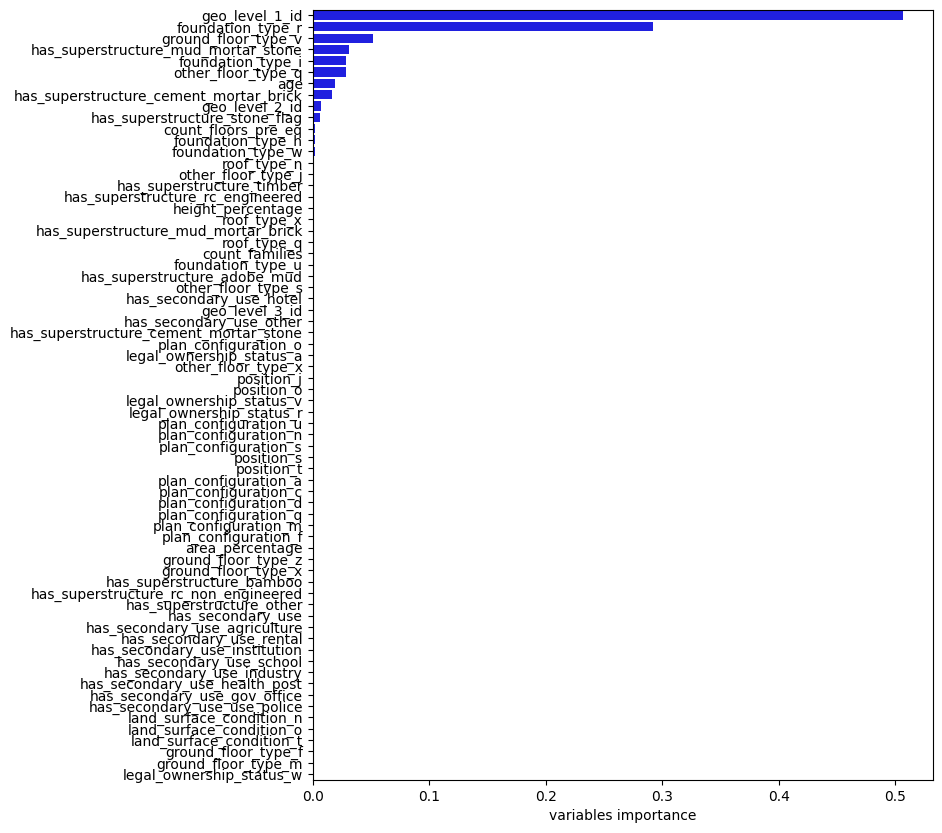

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(
    x     = 'variables importance',
    y     = var_imp_df.index,
    color = 'blue',
    data  = var_imp_df
)

In [ ]:
# Variable Importance
var_imp = gbm_model.feature_importances_

var_imp_df = pd.DataFrame(
    data = var_imp,
    columns = ['variables importance'],
    index = Damage_input.columns
).sort_values('variables importance', ascending=False)
var_imp_df

,variables importance
geo_level_1_id,0.506784
foundation_type_r,0.292352
ground_floor_type_v,0.051448
has_superstructure_mud_mortar_stone,0.031206
foundation_type_i,0.028291
...,...
land_surface_condition_o,0.000000
land_surface_condition_t,0.000000
ground_floor_type_f,0.000000
ground_floor_type_m,0.000000


## 8. Extra problem

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import make_classification
from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
trn_input, tst_input, trn_target, tst_target = train_test_split(Damage_input_scaled, Damage_target2, train_size=150000,stratify=Damage_target2, random_state=12345)
val_input, tst_input, val_target, tst_target = train_test_split(tst_input, tst_target, train_size=50000,stratify= tst_target,random_state=12345)


In [ ]:
print(Damage_input_scaled.shape)
print(Damage_target2.shape)


(260601, 68)
(260601,)


In [ ]:
undersample = RandomUnderSampler(sampling_strategy='not minority')
X_under, y_under = undersample.fit_resample(Damage_input_scaled, Damage_target2)
print(Counter(y_under))



Counter({1: 25124, 2: 25124, 3: 25124})


In [ ]:
print(y_under.shape)
print(X_under.shape)

(75372,)
(75372, 68)


In [ ]:
y_under.value_counts()

1    25124
2    25124
3    25124
Name: damage_grade, dtype: int64

In [ ]:
print(tst_input2.shape)
print(tst_target2.shape)

(32410, 68)
(32410,)


In [ ]:
trn_input2, tst_input2, trn_target2, tst_target2 = train_test_split(X_under, y_under, train_size=0.57,stratify=y_under, random_state=12345)
val_input2, tst_input2, val_target2, tst_target2 = train_test_split(tst_input2, tst_target2, train_size=0.45,stratify=tst_target2,random_state=12345)


In [ ]:
Perf_table2 = pd.DataFrame(
    data    = np.zeros(shape=(8,6)),
    index   = ["Logistic Regression", "CART","ANN","Random Forests", "Bagging CART","Bagging ANN", "AdaBoost", "GBM"],
    columns = ["TPR", "Precision", "TNR", "Accuracy", "BCR", "F1-Measure"]
)
Perf_table2

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.0,0.0,0.0,0.0,0.0,0.0
CART,0.0,0.0,0.0,0.0,0.0,0.0
ANN,0.0,0.0,0.0,0.0,0.0,0.0
Random Forests,0.0,0.0,0.0,0.0,0.0,0.0
Bagging CART,0.0,0.0,0.0,0.0,0.0,0.0
Bagging ANN,0.0,0.0,0.0,0.0,0.0,0.0
AdaBoost,0.0,0.0,0.0,0.0,0.0,0.0
GBM,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression

# model setting
ml_logit = LogisticRegression(
    solver='lbfgs',
    max_iter=int(1e+10)
)

# Train the model with trainset
ml_logit.fit(trn_input2,trn_target2)

LogisticRegression(max_iter=10000000000)

In [ ]:
# Prediction
CART_pre_prediction = ml_logit.predict(tst_input2)
cm = confusion_matrix(tst_target2, CART_pre_prediction)
Perf_table2.iloc[0] = perf_eval(cm)
Perf_table2

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.687189,0.722458,0.827754,0.352855,0.754204,0.704382
CART,1.000000,0.622305,0.000000,0.129552,0.000000,0.767186
ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Random Forests,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging CART,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdaBoost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
cm

array([[4080,  849, 1013],
       [1006, 2210, 2726],
       [ 254, 1667, 4021]])

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=200, max_depth=300, random_state=12345)
dt.fit(trn_input2, trn_target2)

DecisionTreeClassifier(max_depth=300, min_samples_split=200, random_state=12345)

In [ ]:
# Prediction
CART_pre_prediction = dt.predict(tst_input2)
cm = confusion_matrix(tst_target2, CART_pre_prediction)
Perf_table2.iloc[1] = perf_eval(cm)
Perf_table2

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.687189,0.722458,0.827754,0.352855,0.754204,0.704382
CART,0.710334,0.771362,0.830690,0.456131,0.768159,0.739591
ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Random Forests,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging CART,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdaBoost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
cm

array([[4818,  982,  142],
       [1351, 3313, 1278],
       [ 329, 1704, 3909]])

In [ ]:
mlp = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (50,), max_iter = 50, random_state = 12345  )
mlp.fit(trn_input2, trn_target2)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=50,
              random_state=12345)

In [ ]:
# Prediction ANN
CART_pre_prediction = mlp.predict(tst_input2)
cm = confusion_matrix(tst_target2, CART_pre_prediction)
Perf_table2.iloc[2] = perf_eval(cm)
Perf_table2

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.687189,0.722458,0.827754,0.352855,0.754204,0.704382
CART,0.710334,0.771362,0.830690,0.456131,0.768159,0.739591
ANN,0.696884,0.733333,0.813566,0.392685,0.752968,0.714644
Random Forests,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging CART,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdaBoost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
rf_model = RandomForestClassifier(

    n_estimators = 300,
    verbose      = 1,
    random_state = 42,
    n_jobs = -1
).fit(X=trn_input2, y=trn_target2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.4s finished


In [ ]:
# Prediction ANN
CART_pre_prediction = rf_model.predict(tst_input2)
cm = confusion_matrix(tst_target2, CART_pre_prediction)
Perf_table2.iloc[3] = perf_eval(cm)
Perf_table2

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.5s finished


,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.687189,0.722458,0.827754,0.352855,0.754204,0.704382
CART,0.710334,0.771362,0.830690,0.456131,0.768159,0.739591
ANN,0.696884,0.733333,0.813566,0.392685,0.752968,0.714644
Random Forests,0.728421,0.786364,0.850820,0.445361,0.787245,0.756284
Bagging CART,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bagging ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdaBoost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
bagging_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(min_samples_split=250,max_depth=20,random_state=12345,criterion='gini'),
    n_estimators = 300,
    n_jobs = -1,
    bootstrap = True,
    verbose = 0
).fit(X=trn_input2,y=trn_target2)

In [ ]:
# Prediction ANN
CART_pre_prediction = bagging_model.predict(tst_input2)
cm = confusion_matrix(tst_target2, CART_pre_prediction)
Perf_table2.iloc[4] = perf_eval(cm)
Perf_table2

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.687189,0.722458,0.827754,0.352855,0.754204,0.704382
CART,0.710334,0.771362,0.830690,0.456131,0.768159,0.739591
ANN,0.696884,0.733333,0.813566,0.392685,0.752968,0.714644
Random Forests,0.728421,0.786364,0.850820,0.445361,0.787245,0.756284
Bagging CART,0.693135,0.755739,0.830769,0.439527,0.758838,0.723084
Bagging ANN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AdaBoost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
bagging_ann_model = BaggingClassifier(
    base_estimator = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (30,), max_iter = 30,early_stopping=True,solver='adam'),
    n_estimators = 30,
    n_jobs = -1,
    bootstrap = True,
    verbose = 0
).fit(X=trn_input2,y=trn_target2)

In [ ]:
# Prediction ANN
CART_pre_prediction = bagging_ann_model.predict(tst_input2)
cm = confusion_matrix(tst_target2, CART_pre_prediction)
Perf_table2.iloc[5] = perf_eval(cm)
Perf_table2

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.687189,0.722458,0.827754,0.352855,0.754204,0.704382
CART,0.710334,0.771362,0.830690,0.456131,0.768159,0.739591
ANN,0.696884,0.733333,0.813566,0.392685,0.752968,0.714644
Random Forests,0.728421,0.786364,0.850820,0.445361,0.787245,0.756284
Bagging CART,0.693135,0.755739,0.830769,0.439527,0.758838,0.723084
Bagging ANN,0.680805,0.757869,0.844690,0.384551,0.758333,0.717273
AdaBoost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
adaboost_model = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(max_depth=1),
    n_estimators   = 100,
    random_state   = 42
).fit(X=trn_input2, y=trn_target2)

In [ ]:
# Prediction ANN
CART_pre_prediction = adaboost_model.predict(tst_input2)
cm = confusion_matrix(tst_target2, CART_pre_prediction)
Perf_table2.iloc[6] = perf_eval(cm)
Perf_table2

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.687189,0.722458,0.827754,0.352855,0.754204,0.704382
CART,0.710334,0.771362,0.830690,0.456131,0.768159,0.739591
ANN,0.696884,0.733333,0.813566,0.392685,0.752968,0.714644
Random Forests,0.728421,0.786364,0.850820,0.445361,0.787245,0.756284
Bagging CART,0.693135,0.755739,0.830769,0.439527,0.758838,0.723084
Bagging ANN,0.680805,0.757869,0.844690,0.384551,0.758333,0.717273
AdaBoost,0.693024,0.702762,0.785564,0.414900,0.737845,0.697859
GBM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Training GBM
gbm_model = GradientBoostingClassifier(
    n_estimators   = 1000,
    learning_rate  = 0.02,
    subsample      = 0.8,
    random_state   = 42
).fit(X=trn_input2, y=trn_target2)

In [ ]:
# Prediction ANN
CART_pre_prediction = gbm_model.predict(tst_input2)
cm = confusion_matrix(tst_target2, CART_pre_prediction)
Perf_table2.iloc[7] = perf_eval(cm)
Perf_table2

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.687189,0.722458,0.827754,0.352855,0.754204,0.704382
CART,0.710334,0.771362,0.830690,0.456131,0.768159,0.739591
ANN,0.696884,0.733333,0.813566,0.392685,0.752968,0.714644
Random Forests,0.728421,0.786364,0.850820,0.445361,0.787245,0.756284
Bagging CART,0.693135,0.755739,0.830769,0.439527,0.758838,0.723084
Bagging ANN,0.680805,0.757869,0.844690,0.384551,0.758333,0.717273
AdaBoost,0.693024,0.702762,0.785564,0.414900,0.737845,0.697859
GBM,0.727902,0.748635,0.816496,0.441266,0.770928,0.738123


array([[    0,  4347,   780,   716],
       [    0,  6730, 14667, 13079],
       [    0,  1159,  4978, 14145],
       [    0,     0,     0,     0]])